In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 255s 1us/step


In [16]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

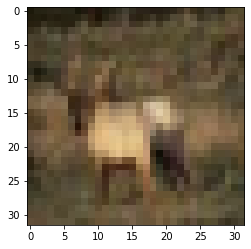

In [7]:
plt.imshow(x_train[3])

In [10]:
x_test.max()

255

In [11]:
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()


In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D,MaxPool2D, Flatten

In [21]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
#128,256,512
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

          

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [23]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.5315 - accuracy: 0.4538
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1689 - accuracy: 0.5912
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0133 - accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9076 - accuracy: 0.6864
Epoch 5/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8216 - accuracy: 0.7177
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7539 - accuracy: 0.7425
Epoch 7/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6923 - accuracy: 0.7653
Epoch 8/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6424 - accuracy: 0.7823
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.5962 - accuracy: 0.7988
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [24]:
model.metrics_names

['loss', 'accuracy']

In [25]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 7ms/step - loss: 1.5352 - accuracy: 0.5724


[1.5352184772491455, 0.5723999738693237]

In [27]:
from sklearn.metrics import classification_report

In [28]:
predictions=model.predict_classes(x_test)

C:\Users\Dell\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.40      0.54      1000
           1       0.55      0.85      0.67      1000
           2       0.56      0.32      0.40      1000
           3       0.38      0.49      0.43      1000
           4       0.61      0.41      0.49      1000
           5       0.56      0.46      0.51      1000
           6       0.43      0.91      0.58      1000
           7       0.87      0.55      0.68      1000
           8       0.81      0.57      0.67      1000
           9       0.66      0.76      0.71      1000

    accuracy                           0.57     10000
   macro avg       0.63      0.57      0.57     10000
weighted avg       0.63      0.57      0.57     10000



In [30]:
model.save('larger_CIFAR10_model.h5')